In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import pandas as series
import numpy as np
import requests
import time
import seaborn as sns
import scipy.stats as st
from scipy.stats import linregress
from IPython.display import display_html
from matplotlib import pyplot

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
input_data_path = "Resources/Covid_data1/worldometer_coronavirus_daily_data.csv"

# Output File (CSV)
output_data_file = "output_data/cities_covid.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Read through the raw data 
covid_metadata_df = pd.read_csv(input_data_path)
covid_metadata_df.head()
covid_metadata_df.tail()


,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
145216,2021-11-28,Zimbabwe,133991.0,40.0,631.0,4705.0,0.0
145217,2021-11-29,Zimbabwe,134226.0,235.0,817.0,4706.0,1.0
145218,2021-11-30,Zimbabwe,134625.0,399.0,1171.0,4707.0,1.0
145219,2021-12-01,Zimbabwe,135337.0,712.0,1846.0,4707.0,0.0
145220,2021-12-02,Zimbabwe,136379.0,1042.0,2843.0,4707.0,0.0


In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

covid_metadata_cumulative_df=covid_metadata_df.sort_values('date').groupby('country').tail(1)
covid_metadata_cumulative_df

country = covid_metadata_cumulative_df['country']
covid_cumulative_1 = covid_metadata_cumulative_df['cumulative_total_cases']
covid_cumulative_2 = covid_metadata_cumulative_df['cumulative_total_deaths']
summary_covid_df = pd.DataFrame({"Country": country, "total_cases": covid_cumulative_1,"total_deaths": covid_cumulative_2})
summary_covid_df 

covid_metadata_cumulative_df


,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
9134,2021-9-30,Bahamas,20984.0,0.0,1964.0,531.0,0.0
107708,2021-9-30,Saint Helena,2.0,0.0,0.0,NaN,NaN
128075,2021-9-30,Syria,34205.0,272.0,8146.0,2247.0,9.0
18332,2021-9-30,British Virgin Islands,2642.0,0.0,NaN,37.0,0.0
105737,2021-9-30,Russia,7511026.0,23888.0,631004.0,207255.0,867.0
...,...,...,...,...,...,...,...
34124,2021-9-30,Cuba,877428.0,5003.0,28864.0,7436.0,58.0
36752,2021-9-30,Democratic Republic Of The Congo,56937.0,75.0,8469.0,1084.0,0.0
53834,2021-9-30,Greenland,576.0,3.0,127.0,NaN,NaN
116906,2021-9-30,Singapore,96521.0,2478.0,18252.0,95.0,2.0


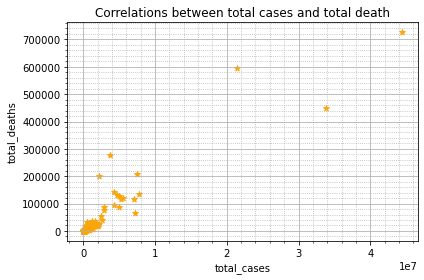

In [3]:
x_values_1 = covid_metadata_cumulative_df["cumulative_total_cases"]
y_values_1 = covid_metadata_cumulative_df["cumulative_total_deaths"]

plt.scatter(x_values_1,y_values_1,marker = "*", color="orange")
plt.title('Correlations between total cases and total death')
plt.xlabel('total_cases')
plt.ylabel('total_deaths')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

plt.savefig("Images/Correlations_1.png")
plt.show()





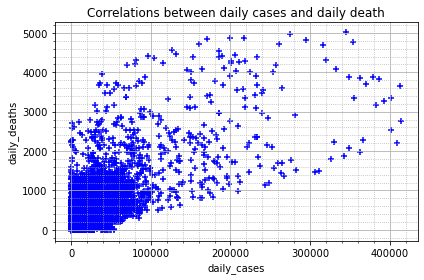

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-2-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-2-16,Afghanistan,0.0,NaN,0.0,0.0,NaN
2,2020-2-17,Afghanistan,0.0,NaN,0.0,0.0,NaN
3,2020-2-18,Afghanistan,0.0,NaN,0.0,0.0,NaN
4,2020-2-19,Afghanistan,0.0,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...
145216,2021-11-28,Zimbabwe,133991.0,40.0,631.0,4705.0,0.0
145217,2021-11-29,Zimbabwe,134226.0,235.0,817.0,4706.0,1.0
145218,2021-11-30,Zimbabwe,134625.0,399.0,1171.0,4707.0,1.0
145219,2021-12-01,Zimbabwe,135337.0,712.0,1846.0,4707.0,0.0


In [13]:
x_values_2 = covid_metadata_df["daily_new_cases"].shift(30) 
y_values_2 = covid_metadata_df["daily_new_deaths"]

plt.scatter(x_values_2,y_values_2,marker = "+", color="blue")
plt.title('Correlations between daily cases and daily death')
plt.xlabel('daily_cases')
plt.ylabel('daily_deaths')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

plt.savefig("Images/Correlations_day30.png")
plt.show()

covid_metadata_df


In [46]:
# Clean the data 
covid_metadata_df["daily_new_cases"] = covid_metadata_df["daily_new_cases"].fillna(0)
covid_metadata_df["daily_new_deaths"] = covid_metadata_df["daily_new_deaths"].fillna(0)
covid_metadata_df

# Linear Regression
x_values_2 = covid_metadata_df["daily_new_cases"].shift(7) 
y_values_2 = covid_metadata_df["daily_new_deaths"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_2, y_values_2)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values_2, y_values_2)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("covid_regression1.png")

# Regression analysis: The regression shows the coefficients between latitude as our independent variable to temperature as the dependent variable. 
# The downward slope showing a negative relations, the intercept equals 98.58 while the slope ratio is -1.41 can be explained as: the degree on latitude (x) would in response of temperature -1.41*1+98.58=97.17 Fahrenhei in northern hemisphere.
# The higher latitude given by value x, the lower temperasture we have. Theoretically, the lowest temperature in cities locate in northern hemisphere is 







covid_metadata_df


,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-2-15,Afghanistan,0.0,0.0,0.0,0.0,0.0
1,2020-2-16,Afghanistan,0.0,0.0,0.0,0.0,0.0
2,2020-2-17,Afghanistan,0.0,0.0,0.0,0.0,0.0
3,2020-2-18,Afghanistan,0.0,0.0,0.0,0.0,0.0
4,2020-2-19,Afghanistan,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
145216,2021-11-28,Zimbabwe,133991.0,40.0,631.0,4705.0,0.0
145217,2021-11-29,Zimbabwe,134226.0,235.0,817.0,4706.0,1.0
145218,2021-11-30,Zimbabwe,134625.0,399.0,1171.0,4707.0,1.0
145219,2021-12-01,Zimbabwe,135337.0,712.0,1846.0,4707.0,0.0


In [5]:
# Study data files
mouse_metadata_path = "Resources/Covid_global.csv"
mouse_metadata_path= df.groupby(['country','date'])['confirmed','deaths','recovered'].sum()

df = pd.DataFrame(mouse_metadata_path)
df.to_csv ('mouse_metadata_path', index = False, header=True)
           
Covid_global_new_path= "Resources/Covid_global_new.csv"    
Covid_global_new = pd.read_csv(Covid_global_new_path)
 
Covid_global_new 

study_results_path = "Resources/vaccinations.csv"
country_path = "Resources/Country_type.csv"

# Read the mouse data and the study results

study_results = pd.read_csv(study_results_path)
country_data= pd.read_csv(country_path)

# Combine the data into a single dataset
merged_table_df = pd.merge(Covid_global_new, study_results, on="code", how="left")

merged_data_df= pd.merge(merged_table_df, country_data, on="countryregion", how="left")

# Display the data table for preview
merged_data_df.head()
# Range of latitudes and longitudes
lat_range = (-90, 90)
                             
merged_data_df
 
date=merged_data_df['observationdate']     
country= merged_data_df['countryregion']    
confirmed= merged_data_df['confirmed']    
deaths= merged_data_df['deaths']   
recovered= merged_data_df['recovered']   
full_vaccinated= merged_data_df['people_fully_vaccinated'].shift(7)     
daily_vaccinated= merged_data_df['daily_vaccinations_raw'].shift(7)     
total_vaccinations_ph= merged_data_df['total_vaccinations_per_hundred'].shift(7)     
people_vaccinated_ph= merged_data_df['people_vaccinated_per_hundred'].shift(7)     
people_fully_ph= merged_data_df['people_fully_vaccinated_per_hund'].shift(7)     
daily_vaccinated_ph= merged_data_df['daily_vaccinations_per_million'].shift(7)     
vaccines= merged_data_df['vaccines'] 
country_type= merged_data_df['Categories'] 

covid_merged_df =pd.DataFrame({"date": date, "country": country,"confirmed": confirmed,"deaths": deaths,"recovered":recovered,"full_vaccinated":full_vaccinated, "daily_vaccinated":daily_vaccinated, "total_vaccinations_ph":total_vaccinations_ph,"people_vaccinated_ph":people_vaccinated_ph,"people_fully_ph":people_fully_ph,"daily_vaccinated_ph":daily_vaccinated_ph,"vaccines":vaccines})   

covid_merged_df  

merged_table_df





NameError: name 'df' is not defined

In [214]:
covid_merged_df.corr()


,confirmed,deaths,recovered,full_vaccinated,daily_vaccinated,total_vaccinations_ph,people_vaccinated_ph,people_fully_ph,daily_vaccinated_ph
confirmed,1.000000,0.888481,0.633902,0.112642,0.107222,0.018813,0.009779,0.023457,0.000263
deaths,0.888481,1.000000,0.536184,0.063850,0.049371,0.002909,-0.000211,0.004651,-0.006190
recovered,0.633902,0.536184,1.000000,0.154537,0.147132,0.002616,-0.008388,0.009335,-0.038277
full_vaccinated,0.112642,0.063850,0.154537,1.000000,0.683024,0.246656,0.234467,0.240400,0.125245
daily_vaccinated,0.107222,0.049371,0.147132,0.683024,1.000000,0.086245,0.101612,-0.001493,0.072667
total_vaccinations_ph,0.018813,0.002909,0.002616,0.246656,0.086245,1.000000,0.980853,0.925696,0.796839
people_vaccinated_ph,0.009779,-0.000211,-0.008388,0.234467,0.101612,0.980853,1.000000,0.832960,0.838054
people_fully_ph,0.023457,0.004651,0.009335,0.240400,-0.001493,0.925696,0.832960,1.000000,0.687734
daily_vaccinated_ph,0.000263,-0.006190,-0.038277,0.125245,0.072667,0.796839,0.838054,0.687734,1.000000


In [307]:








x_values_2 = covid_merged_df["people_fully_ph"]
y_values_2 = covid_merged_df["confirmed"].shift(7) 

plt.scatter(x_values_2,y_values_2,marker = "+", color="blue")
plt.title('Correlations between daily vaccinated and daily cases confirmed')
plt.xlabel('people_fully_ph')
plt.ylabel('daily cases confirmed')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

plt.savefig("Images/Correlations_3.png")
plt.show()

covid_merged_df.describe()





KeyError: 'code'

In [ ]:
# Other variable statistics 

dates= covid_metadata_df['date']
daily_new_cases= covid_metadata_df['daily_new_cases']
daily_new_deaths= covid_metadata_df['daily_new_deaths']
country= covid_metadata_df['country']

summary_statistics_df_daily = pd.DataFrame({"Date": dates,"Country": country, "Daily_new": daily_new_cases,"Daily_new_death": daily_new_deaths})
summary_statistics_df_daily

x_axis_tp = summary_statistics_df_daily["Date"]
Daily_new = summary_statistics_df_daily["Daily_new"]

plt.plot(x_axis_tp, Daily_new,  linewidth = 1)
plt.title ('Daily new cases distribution by country')
plt.xlabel('date since 2020-2-15')
plt.ylabel('Daily new cases')
plt.show()



#Convert the data into a dataframe
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_df



# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mean_daily = covid_metadata_df.groupby('country')['daily_new_cases'].mean()
mean_active = covid_metadata_df.groupby('country')['active_cases'].mean()
mean_new = covid_metadata_df.groupby('country')['daily_new_deaths'].mean()

median_daily = covid_metadata_df.groupby('country')['daily_new_cases'].median()
median_active = covid_metadata_df.groupby('country')['active_cases'].median()
median_new = covid_metadata_df.groupby('country')['daily_new_deaths'].median()

var_daily = covid_metadata_df.groupby('country')['daily_new_cases'].var()
var_active = covid_metadata_df.groupby('country')['active_cases'].var()
var_new = covid_metadata_df.groupby('country')['daily_new_deaths'].var()

std_daily = covid_metadata_df.groupby('country')['daily_new_cases'].std()
std_active = covid_metadata_df.groupby('country')['active_cases'].std()
std_new = covid_metadata_df.groupby('country')['daily_new_deaths'].std()

sem_daily = covid_metadata_df.groupby('country')['daily_new_cases'].sem()
sem_active = covid_metadata_df.groupby('country')['active_cases'].sem()
sem_new = covid_metadata_df.groupby('country')['daily_new_deaths'].sem()

summary_statistics_df_daily = pd.DataFrame({ "Mean": mean_daily, "Median": median_daily, "Variance": var_daily, "Standard Deviation": std_daily, "SEM" : sem_daily})
summary_statistics_df_active = pd.DataFrame({"Mean": mean_active, "Median": median_active, "Variance": var_active, "Standard Deviation": std_active, "SEM" : sem_active})
summary_statistics_df_new = pd.DataFrame({"Mean": mean_new, "Median": median_new, "Variance": var_new, "Standard Deviation": std_new, "SEM" : sem_new})

summary_statistics_df_daily
summary_statistics_df_active
summary_statistics_df_new

# Geographic distribution of cumulative cases 
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)






# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("That record does not exist, searching for next record...")



